In [1]:
import os
os.chdir("/users/antoine/desktop/Park and Phillips algorithm")

from djikstra_park_and_phillips import *
import networkx as nx
import time
from sage.all import *
from create_Gs_and_table import *

We create the primal graph with weighted edges and weighted vertices, it must be planar to create the dual.

In [2]:
#'''
g = graphs.KittellGraph()
#g = graphs.MarkstroemGraph()
#g = graphs.BuckyBall()
#g = graphs.CircularLadderGraph(15)
#g = graphs.HarborthGraph()

Gf = nx.Graph()
Gf.add_nodes_from(g.vertices(),weight=1)
Gf.add_edges_from([(ed[0],ed[1]) for ed in g.edges()],weight=2)
#'''

In [3]:
print("number of nodes of the input graph : "+str(len(list(Gf.nodes()))))
print("number of edges of the input graph : "+str(len(list(Gf.edges()))))

number of nodes of the input graph : 23
number of edges of the input graph : 63


In [4]:
t_total = time.time()

In [5]:

W = get_W(Gf)
print("W = "+str(W))


t_dual_Gs = time.time()
Gs,G_dual,dual_embedding,edges_tree,dico_edge_dual = create_Gs(Gf)

expanded_Gs = create_expanded_Gs(Gs,W)
t_dual_Gs = time.time() - t_dual_Gs
print("        number of nodes of expanded_Gs : "+str(len(expanded_Gs.vertices())))
print("        number of edges of expanded_Gs : "+str(len(expanded_Gs.edges())))


W = 23
computing of the dual Graph : 
        number of nodes of the dual graph : 42
        number of edges of the dual graph : 63
labelling of the spanning tree of the dual : 
Creation of Gs : 
OUTER FACE : 
[(4, 5), (4, 18), (5, 22), (19, 20), (18, 20), (19, 21), (21, 22)]
        number of nodes of Gs : 42
        number of edges of Gs : 126
        number of nodes of expanded_Gs : 1974
        number of edges of expanded_Gs : 5696


In [6]:
#'''
print("computing of the table : ")
t_table = time.time()

#epsilon must be between 0 and 0.5, it determines the balance we wich to have in our cut. 
#if epsilon = 0, the cut in the result will have a perfect balance
epsilon = 0

table,cutset,cost_cut,min_pseudo_quot,min_path = create_table_T(expanded_Gs,Gs,W,dico_edge_dual,epsilon = epsilon)
t_table = time.time() - t_table
t_total = time.time() - t_total
#'''
print("cycle in expanded_GS that minimizes the pseudo-quotient : "+str(min_path))

computing of the table : 
computing of the table stop with cost of cut inferior to 0
To improve the computing time, we won't compute all the cycles in expanded_Gs, 
only the cycle that enclose a weight between 21/2 and 25/2
number of paths computed in expanded_Gs : 240
cycle in expanded_GS that minimizes the pseudo-quotient : ['6_0', '5_0', '22_0', '21_0', '19_0', '38_6', '37_6', '35_7', '32_7', '8_8', '9_16', '1_16']


In [7]:
#'''
print("cut set that minimizes the quotient : ")
print(cutset)

print("value of the minimum quotient : ")
print(min_pseudo_quot)

print("cost of the cut : ")
print(cost_cut)
#'''

cut set that minimizes the quotient : 
[(0, 7), (6, 7), (6, 18), (6, 17), (15, 17), (15, 22), (15, 21), (11, 21), (10, 11), (1, 11), (1, 2), (0, 1)]
value of the minimum quotient : 
24/11
cost of the cut : 
24


In [8]:
#'''
print("total computing time : "+str(round(t_total,2))+" secondes")
print("computing time of the dual graph and transformation of the dual (Gs and expanded_Gs): "+str(round(t_dual_Gs,2))+" secondes")
print("computing time of the table : "+str(round(t_table,2))+" secondes")
#'''

total computing time : 2.21 secondes
computing time of the dual graph and transformation of the dual (Gs and expanded_Gs): 0.1 secondes
computing time of the table : 2.06 secondes


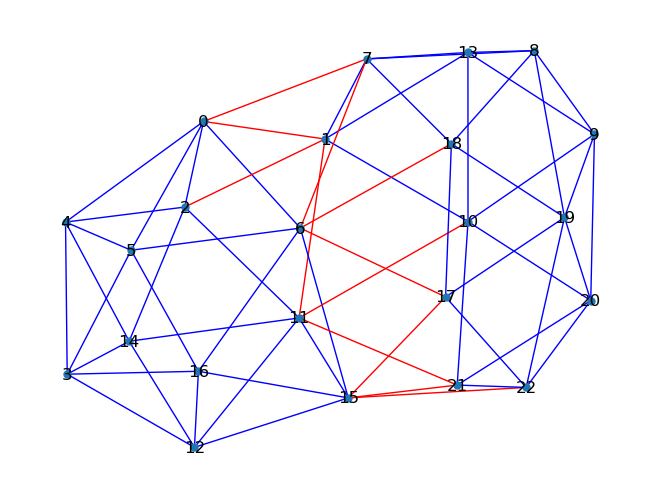

In [9]:
#'''
list_color=[]
for u,v in Gf.edges():
    if (u,v) in cutset or (v,u) in cutset:
        list_color.append('red')
    else:
        list_color.append('blue')
nx.draw(Gf, pos=nx.spring_layout(Gf),node_size=25,with_labels=True,edge_color=list_color)
#nx.draw(Gf, pos=nx.planar_layout(Gf),node_size=25,with_labels=True,edge_color=list_color)
#'''

# Some examples of sparsest cut with this algorithm

## 1. Simple Graph

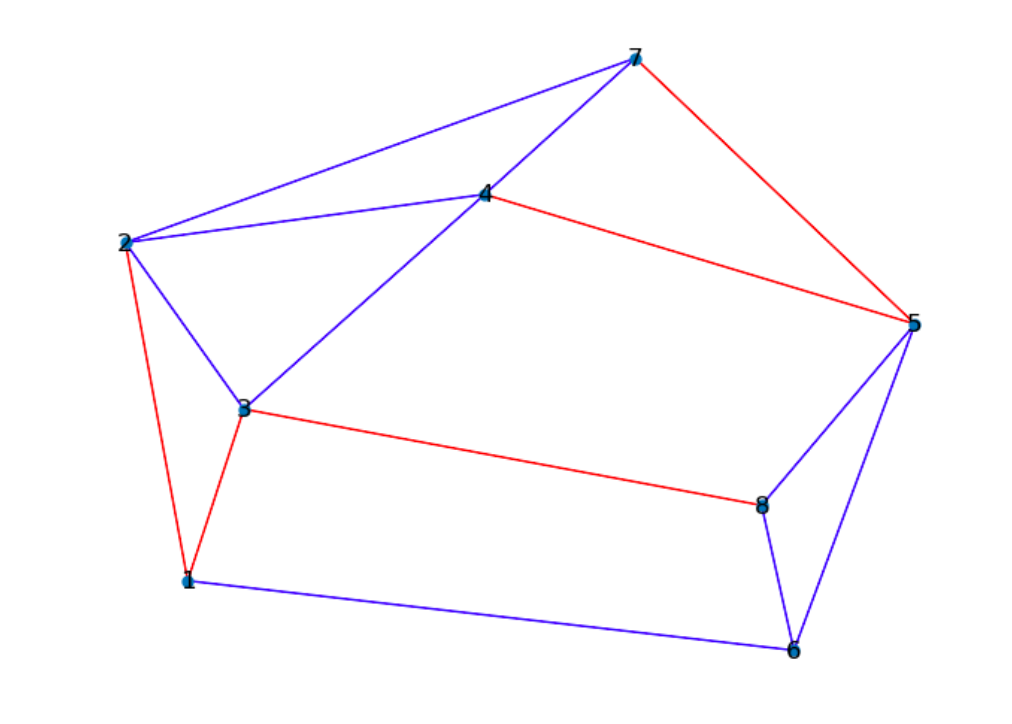

Simple Graph (8 nodes and 14 edges) -> sparsest cut computed in 0.1 secondes

cut set : [(3, 8), (4, 5), (5, 7), (1, 2), (1, 3)]

value of the minimum quotient : 5/2

cost of the cut : 10

## 2. Harborth Graph

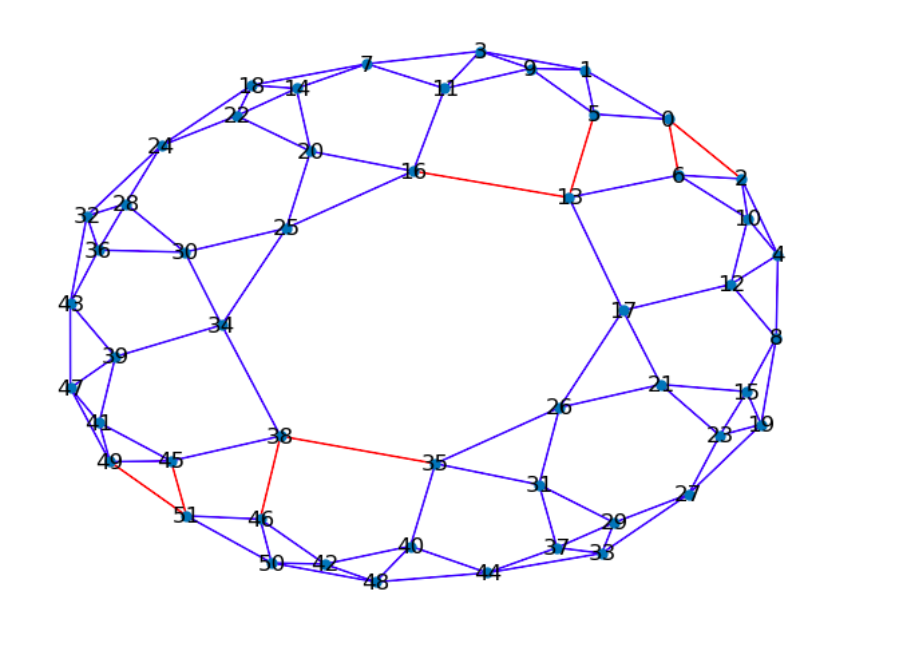

HarborthGraph (52 nodes and 104 edges) -> sparsest cut computed in 7.8 sec 

cut set : [(0, 6), (5, 13), (13, 16), (35, 38), (38, 46), (45, 51), (49, 51), (0, 2)] 

value of the minimum quotient : 8/13 

cost of the cut : 16 

## 3. Circular Ladder Graph

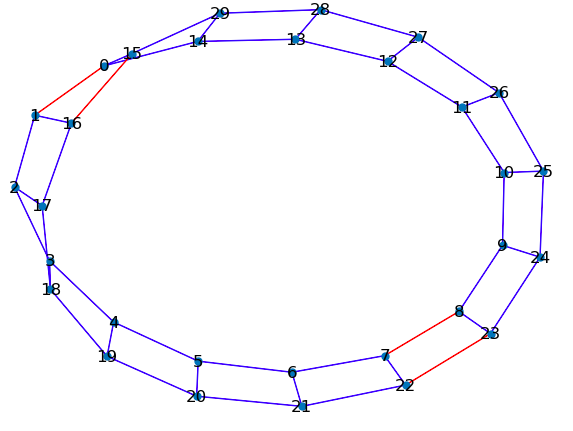

Circular Ladder Graph (30 nodes and 45 edges) -> sparsest cut computed in 0.64 sec 

cut set : [(7, 8), (22, 23), (15, 16), (0, 1)] 

value of the minimum quotient : 4/7

cost of the cut : 8

## 4. BuckyBall Graph

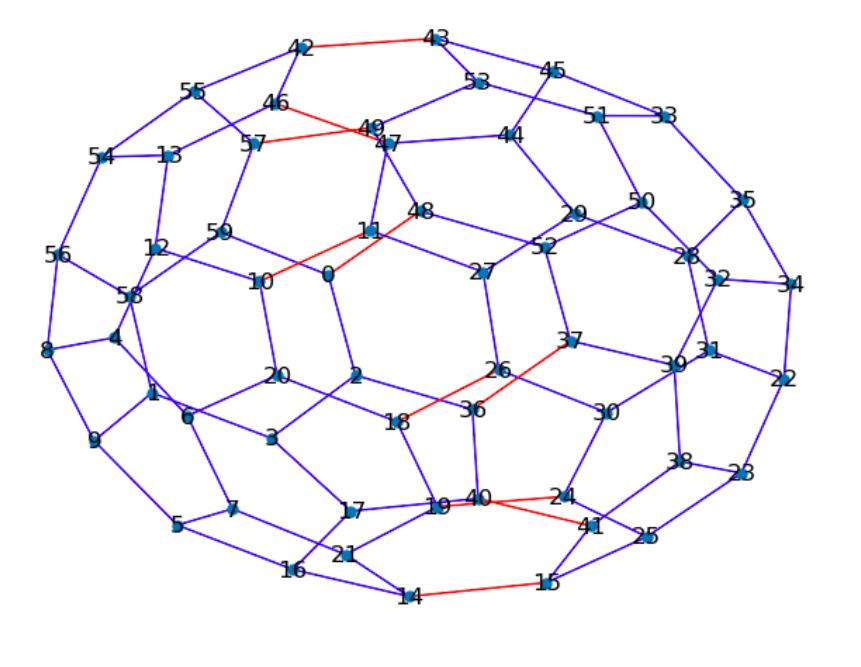

BuckyBall Graph (60 nodes and 90 edges) -> sparsest cut computed in 7.91 sec 

cut set : [(49, 57), (42, 43), (46, 47), (10, 11), (18, 26), (19, 24), (14, 15), (40, 41), (36, 37), (0, 48)]

value of the minimum quotient : 2/3

cost of the cut : 20